In [2]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
# import pafy


# url = "https://www.youtube.com/watch?v=6vxUZFaXrhA"
# video = pafy.new(url)
# best = video.getbest(preftype = "mp4")


videoName = "f1.mp4"

cap = cv2.VideoCapture(videoName)
# cap.open(best.url)

ret, frame = cap.read()

frame = cv2.resize(frame, (600, 400))


# while True:
#     ret, frame = cap.read()
#     if ret == True:
#         cv2.imshow("frame", frame)
#         if cv2.waitKey(25) & 0xFF == ord("q"):
#             break

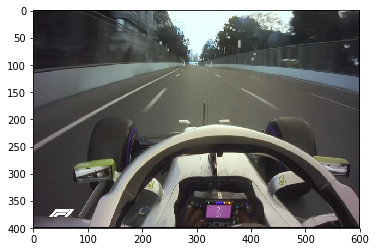

In [3]:
plt.imshow(frame)

In [4]:
import glob


already_exists = [file.split("/")[-1] for file in glob.glob("Masks/*")]

print(already_exists)

['mask_video.png']


In [ ]:
import glob

already_exists = [file.split("/")[-1] for file in glob.glob("Masks/*")]
print(already_exists)

check = "mask_{}.png".format(videoName.split(".")[0])

bol = False
if check in already_exists:
    print("Já Existe: ", check)
    print("Pular para vídeo")
    bol = True
    mask = cv2.imread("Masks/mask_{}.png".format(videoName.split(".")[0]), 0)

if bol == False:

    mask = np.zeros(frame.shape, dtype = np.uint8)

    drawing = False # true if mouse is pressed
    mode = True # write/erase
    mode2 = False # ret or circle
    
    ix,iy = -1,-1
    ix2, iy2 = -1, -1



    img_copy = frame.copy()

    # mouse callback function
    def draw_circle(event,x,y,flags,param):
        global ix,iy,drawing,mode
        global ix2, iy2, erasing

        if event == cv2.EVENT_LBUTTONDOWN:
            drawing = True
            ix,iy = x,y



        elif event == cv2.EVENT_MOUSEMOVE:
            if drawing == True:
                if mode == True:
                    #cv2.rectangle(img_copy,(ix,iy),(x,y),(255,255,255),-1)
                    if mode2 == True:
                        cv2.rectangle(mask,(ix,iy),(x,y),(255,255,255),-1)
                    else:
                        cv2.circle(mask, (x, y), 3, (255, 255, 255), -1)
                else:
                    #cv2.circle(img_copy,(x,y),5,(255,255,255),-1)
                    if mode2 == True:
                        cv2.rectangle(mask,(ix,iy),(x,y),(0,0,0),-1)
                    else:
                        cv2.circle(mask, (x, y), 3, (0, 0, 0), -1)


        elif event == cv2.EVENT_LBUTTONUP:
            drawing = False
            if mode2 == True:
                if mode == True:
                    cv2.rectangle(mask,(ix,iy),(x,y),(255,255,255),-1)
                else:
                    cv2.rectangle(mask,(ix,iy),(x,y),(0,0,0),-1)
                    #cv2.circle(img,(x,y),5,(0,0,255),-1)
            else:
                if mode == True:
                    cv2.circle(mask,(x,y), 3, (255,255,255),-1)
                else:
                    cv2.circle(mask,(x,y), 3,(0,0,0),-1)


    #img = np.zeros((512,512,3), np.uint8)
    #img = img_copy
    cv2.namedWindow('image')
    cv2.setMouseCallback('image',draw_circle)

    while(1):
        img = frame.copy()
        img = cv2.add(img, mask)
        cv2.imshow('image', img)
        k = cv2.waitKey(1) & 0xFF
        if k == ord('m'):
            mode = not mode
        if k == ord('n'):
            mode2 = not mode2
        elif k == 27:
            break

    cv2.destroyAllWindows()
    
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    plt.imshow(mask)
    cv2.imwrite("Masks/mask_{}.png".format(videoName.split(".")[0]), mask)

['mask_video.png']


In [26]:
inpainted = cv2.inpaint(frame, mask, 3, cv2.INPAINT_TELEA)

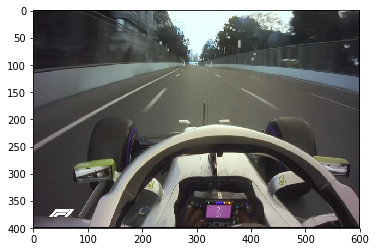

In [20]:
plt.imshow(inpainted)

In [21]:
cap = cv2.VideoCapture(videoName)
# cap.open(best.url)

#ret, frame = cap.read()

mode = True


while(1):
    ret, frame = cap.read()
    if ret == True:
        frame = cv2.resize(frame, (600, 400))
        inpainted = cv2.inpaint(frame, mask, 3, cv2.INPAINT_TELEA)
        
        cv2.imshow('image', frame)
        cv2.imshow('inpainted', inpainted)
        if mode == True:
            cv2.imshow("Escolha", inpainted)
        else:
            cv2.imshow("Escolha", frame)
        
        k = cv2.waitKey(1) & 0xFF
        if k == ord('i'):
            mode = not mode
        elif k == 27:
            break

cv2.destroyAllWindows()